In [1]:
# Mithil Patel
# DSC 630 - Week 3 Assignment
# 12/18/2022

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dodgers-2022.csv")
df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
## Finding null values in each column 
df.isna().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

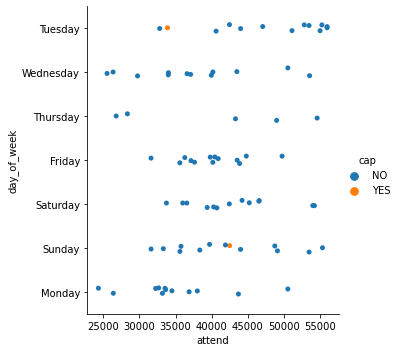

In [4]:
# # Investigating a correlation between the explanatory variable and response variable
# plt.figure(figsize=(12,6))
# sns.heatmap(df.corr(),annot = True)
sns.catplot(data=df, x="attend", y="day_of_week", hue= "cap")

<AxesSubplot:xlabel='bobblehead'>

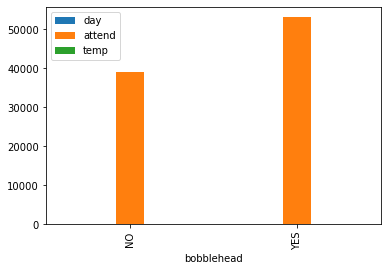

In [5]:
df.groupby(["bobblehead"]).mean().plot(kind="bar")

In [6]:
dummy_df = pd.get_dummies(df)
dummy_df = dummy_df.drop(['day','cap_NO','shirt_NO','fireworks_NO','bobblehead_NO'], axis = 1)
dummy_df.head()

,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,...,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES
0,56000,67,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,29729,58,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,28328,57,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,31601,54,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,46549,57,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [7]:
# Splitting our dataframe into exploratory and dependent variable.
from sklearn.model_selection import train_test_split

x = dummy_df.iloc[:,1:]
y = dummy_df.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

In [8]:
from sklearn.feature_selection import chi2
chi_2 = chi2(x_train,y_train)
p_values = pd.Series(chi_2[1])
p_values.index = x_train.columns
p_values.sort_index(ascending=True)

bobblehead_YES           0.794930
cap_YES                  0.476112
day_night_Day            0.877940
day_night_Night          1.000000
day_of_week_Friday       0.839477
day_of_week_Monday       0.723567
day_of_week_Saturday     0.655922
day_of_week_Sunday       0.755310
day_of_week_Thursday     0.548352
day_of_week_Tuesday      0.723567
day_of_week_Wednesday    0.813447
fireworks_YES            0.863309
month_APR                0.861235
month_AUG                0.861235
month_JUL                0.690349
month_JUN                0.584618
month_MAY                0.921165
month_OCT                0.512084
month_SEP                0.723567
opponent_Angels          0.476112
opponent_Astros          0.512084
opponent_Braves          0.512084
opponent_Brewers         0.512084
opponent_Cardinals       0.620578
opponent_Cubs            0.476112
opponent_Giants          0.813447
opponent_Marlins         0.440714
opponent_Mets            0.440714
opponent_Nationals       0.476112
opponent_Padre

In [9]:
type(p_values.sort_index(ascending=True))

pandas.core.series.Series

In [10]:
# From Chi2 above, the feature are all random and appear to have no dependence
# with the attendence as the pvalue is below 5 percent

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import numpy as np

random_forest = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 42)
random_forest.fit(x_train,y_train)

# Use the forest's predict method on the test data
predictions = random_forest.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2))

Accuracy: 92.53


In [11]:
# Get numerical feature importances
feature_list = list(x_train.columns)
importances = list(random_forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: bobblehead_YES       Importance: 0.33
Variable: temp                 Importance: 0.13
Variable: month_JUN            Importance: 0.08
Variable: opponent_Brewers     Importance: 0.05
Variable: day_of_week_Monday   Importance: 0.04
Variable: opponent_Pirates     Importance: 0.04
Variable: month_MAY            Importance: 0.03
Variable: day_of_week_Tuesday  Importance: 0.03
Variable: opponent_Snakes      Importance: 0.03
Variable: day_of_week_Wednesday Importance: 0.02
Variable: opponent_Braves      Importance: 0.02
Variable: opponent_Padres      Importance: 0.02
Variable: opponent_Reds        Importance: 0.02
Variable: shirt_YES            Importance: 0.02
Variable: month_APR            Importance: 0.01
Variable: day_of_week_Saturday Importance: 0.01
Variable: day_of_week_Sunday   Importance: 0.01
Variable: day_of_week_Thursday Importance: 0.01
Variable: opponent_Cardinals   Importance: 0.01
Variable: opponent_Giants      Importance: 0.01
Variable: opponent_Nationals   Importan

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

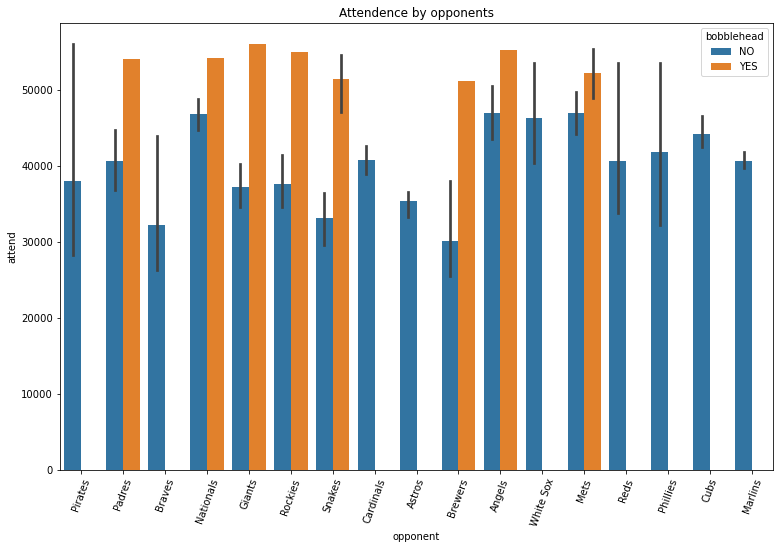

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x=df.opponent, y=df.attend,hue=df.bobblehead).set_title('Attendence by opponents')
plt.xticks(rotation=70)
plt.tight_layout()
plt.gcf().set_size_inches(12,10)

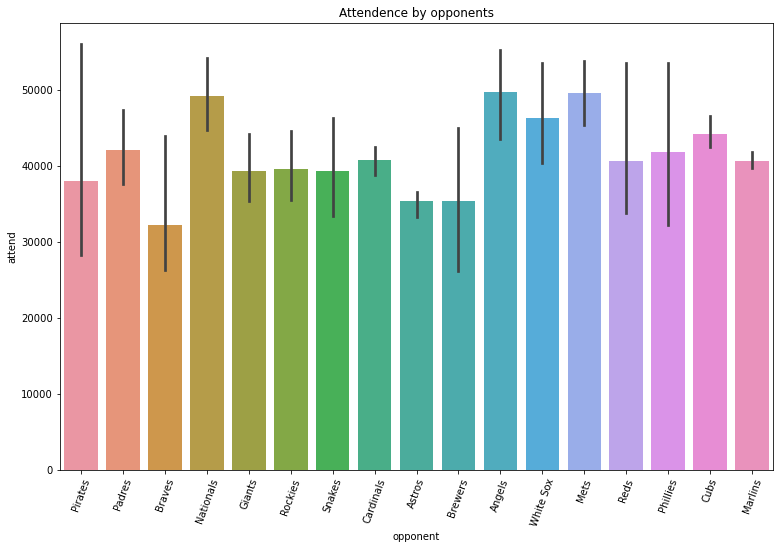

In [13]:
sns.barplot(data=df, x=df.opponent, y=df.attend).set_title('Attendence by opponents')
plt.xticks(rotation=70)
plt.tight_layout()
plt.gcf().set_size_inches(12,10)

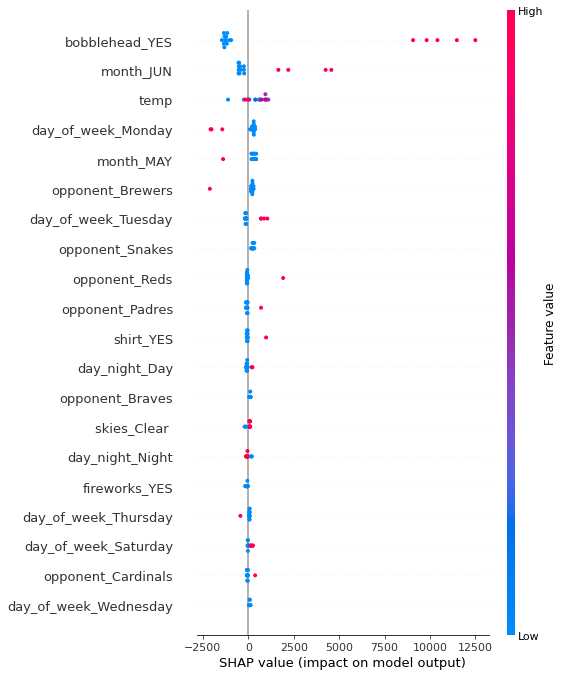

In [14]:
# Creating a SHAP dependence plots for our logistic regression model
import shap
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Dodgers-Gaints rivelry: not the most attendance (average at best)
Not attendence when bobbleheads are given out (Assumptions that bobblehead column means giving out bobblehead by dodgers)

In [15]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(chi2, k='all').fit(x_train,y_train)
x_new = selector.transform(x_train) # not needed to get the score
scores = selector.scores_
scores

array([67.28804464, 50.09090909, 50.09090909, 56.        , 59.        ,
       47.        , 61.        , 55.        , 51.        , 55.        ,
       57.        , 54.        , 60.        , 55.        , 52.        ,
       62.        , 61.        , 61.        , 61.        , 58.        ,
       62.        , 52.        , 63.        , 63.        , 62.        ,
       56.        , 63.        , 50.33333333, 62.        , 56.        ,
       55.        , 62.        , 16.        , 48.        , 49.33333333,
       11.38461538, 62.        , 62.        , 50.        , 52.66666667])